In [1]:
from Hopfield import *
import pandas as pd
from IPython.display import HTML

In [2]:
def pattern_visualise(pattern, network: HopfieldNetwork):
    plt.figure(figsize=network.shape)
    plt.imshow(np.array(pattern).reshape(network.shape), cmap='gray', interpolation='nearest')
    plt.title("Pattern")
    plt.axis('off')
    plt.show()


In [3]:
# Define patterns to store
pattern1 = [-1, 1, 
            1, 1]


network = HopfieldNetwork(n_neurons=4, shape=(2, 2))

network.train([pattern1], learning_rule='hebbian')

expected = np.array([
    [0, -1 , -1, -1],
    [-1, 0 , 1, 1],
    [-1, 1 , 0, 1],
    [-1, 1 , 1, 0]
])

assert np.array_equal(network.weights, expected)

In [4]:
# Define patterns to store
pattern1 = [-1, -1, 
            1, 1]


network = HopfieldNetwork(n_neurons=4, shape=(2, 2))

network.train([pattern1], learning_rule='hebbian')

expected = np.array([
    [0, 1 , -1, -1],
    [1, 0 , -1, -1],
    [-1, -1 , 0, 1],
    [-1, -1 , 1, 0]
])

assert np.array_equal(network.weights, expected)

In [5]:
from unittest.mock import patch

# Define patterns to store
pattern1 = [-1, -1, 
            1, 1]


network = HopfieldNetwork(n_neurons=4, shape=(2, 2))


network.train([pattern1], learning_rule='hebbian')

noisy_pattern = [1, -1,
                 1, -1]


with patch('numpy.random.randint', return_value=0):
    states = network.retrieve(noisy_pattern, mode='asynchronous')
    assert np.array_equal(states[1], [-1, -1, 1, -1])

In [6]:
from unittest.mock import patch

# Define patterns to store
pattern1 = [-1, -1, 
            1, 1]

network = HopfieldNetwork(n_neurons=4, shape=(2, 2))

network.train([pattern1], learning_rule='hebbian')

noisy_pattern = [-1, -1,
                 1, -1]


with patch('numpy.random.randint', return_value=0):
    states = network.retrieve(noisy_pattern, mode='asynchronous')
    assert np.array_equal(states[1], [-1, -1, 1, -1])

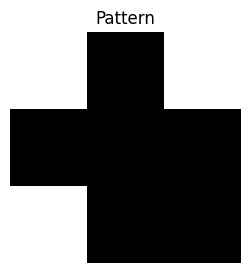

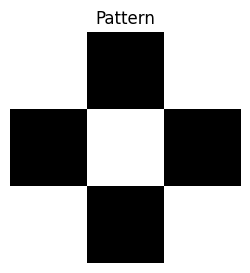

10


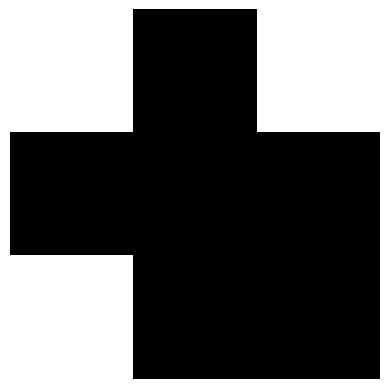

In [7]:
# Define patterns to store
pattern1 = [1, -1, 1, -1, 1, -1, 1, -1, 1]
pattern2 = [-1, 1, -1, 1, -1, 1, -1, 1, -1]

network = HopfieldNetwork(n_neurons=9, shape=(3, 3))

network.train([pattern1, pattern2], learning_rule='hebbian')

noisy_pattern = [1, -1, 1, -1, -1, -1, 1, -1, -1]

# Retrieve the pattern and get the states for visualization
states = network.retrieve(noisy_pattern, mode='asynchronous')

pattern_visualise(noisy_pattern, network)

pattern_visualise(network.state, network)

print(len(states))

anim = network.interactive_visualize(states)
HTML(anim.to_jshtml())





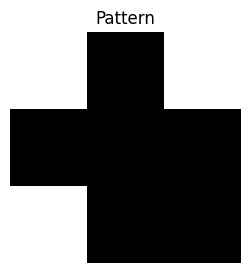

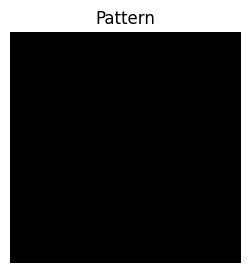

10


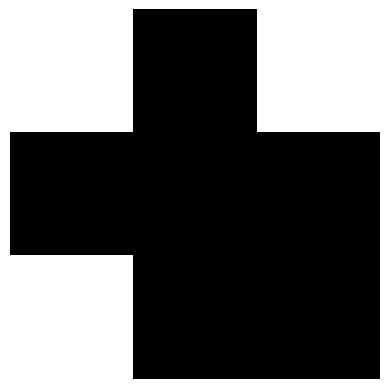

In [8]:
# Define patterns to store
pattern1 = [1, -1, 1, -1, 1, -1, 1, -1, 1]
pattern2 = [-1, 1, -1, 1, -1, 1, -1, 1, -1]

network = HopfieldNetwork(n_neurons=9, shape=(3, 3))

network.train([pattern1, pattern2], learning_rule='oja')

noisy_pattern = [1, -1, 1, -1, -1, -1, 1, -1, -1]

# Retrieve the pattern and get the states for visualization
states = network.retrieve(noisy_pattern, mode='asynchronous')

pattern_visualise(noisy_pattern, network)

pattern_visualise(network.state, network)

print(len(states))

anim = network.interactive_visualize(states)
HTML(anim.to_jshtml())

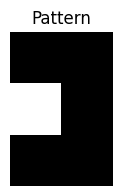

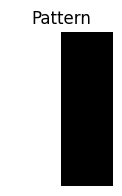

2


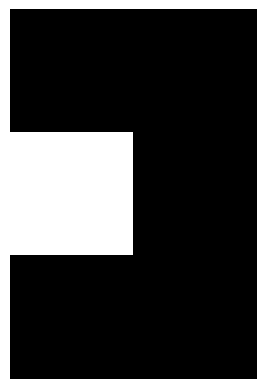

In [9]:
# Define patterns to store
pattern1 = [1, -1, 
            1, -1, 
            1, -1]


network = HopfieldNetwork(n_neurons=6, shape=(3, 2))


network.train([pattern1], learning_rule='oja')

noisy_pattern = [-1, -1, 
                 1, -1, 
                 -1, -1]

# Retrieve the pattern and get the states for visualization
states = network.retrieve(noisy_pattern, mode='synchronous')

pattern_visualise(noisy_pattern, network)

pattern_visualise(network.state, network)

print(len(states))

anim = network.interactive_visualize(states)
HTML(anim.to_jshtml())

Test animals 14x9

In [10]:
animals = pd.read_csv('projekt3.tar/projekt2/animals-14x9.csv', header = None)
animals_list = animals.values.tolist()
print(animals_list)

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -

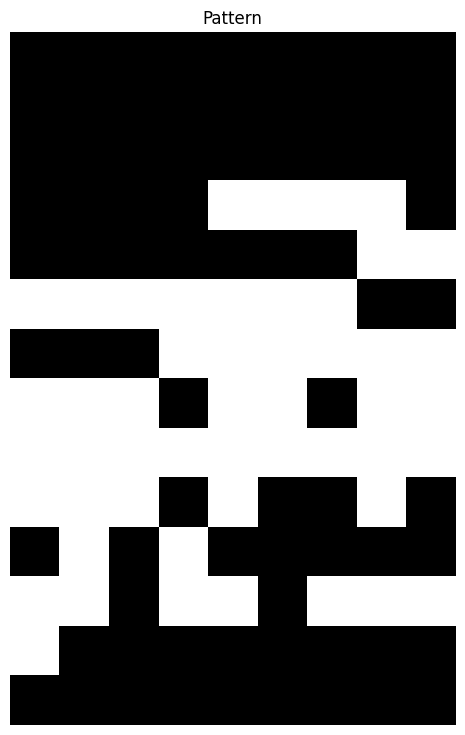

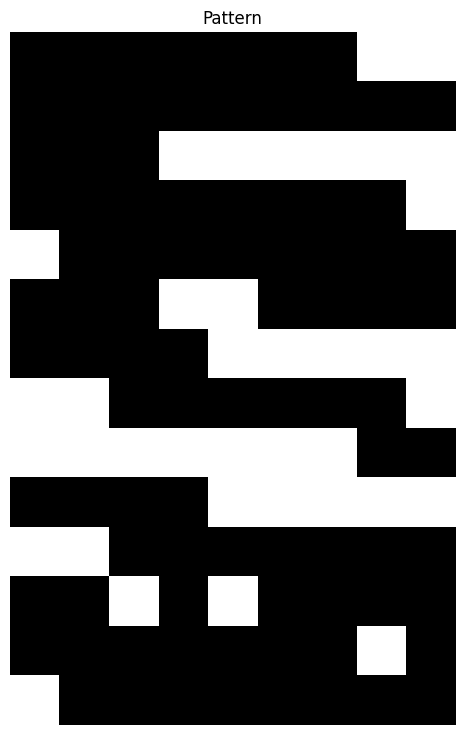

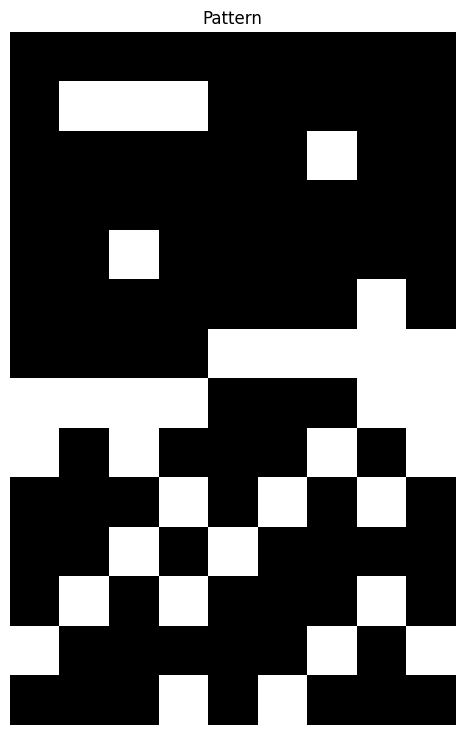

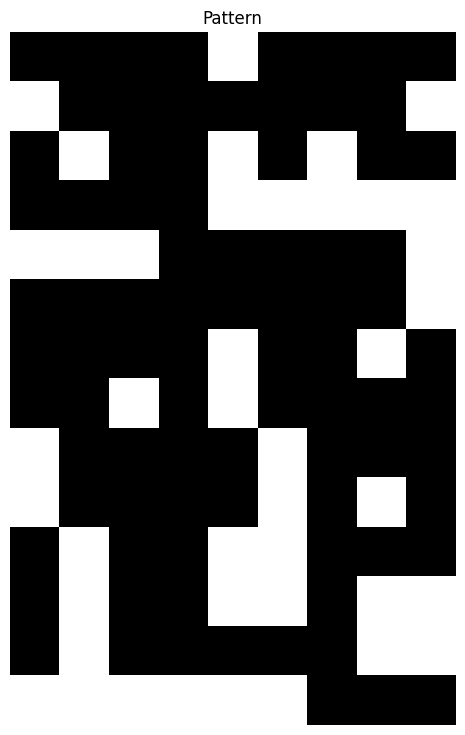

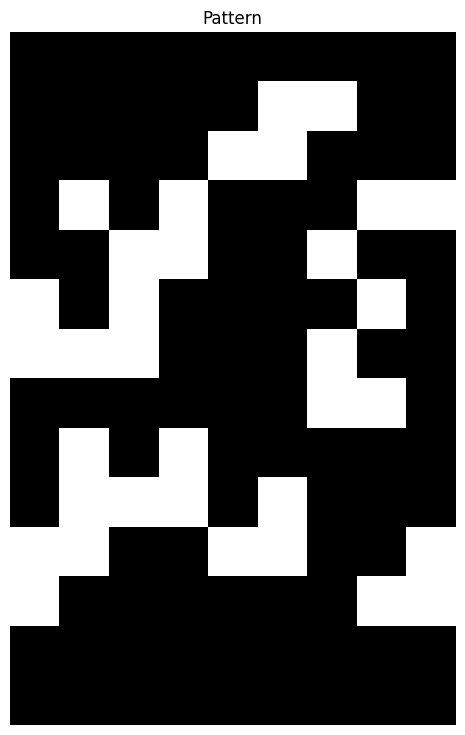

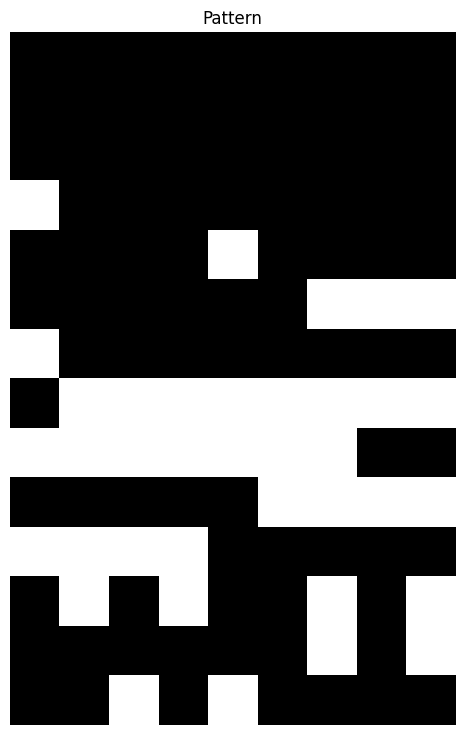

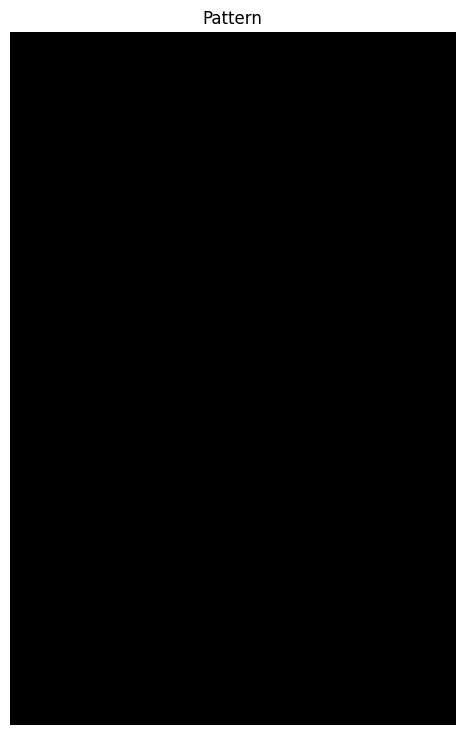

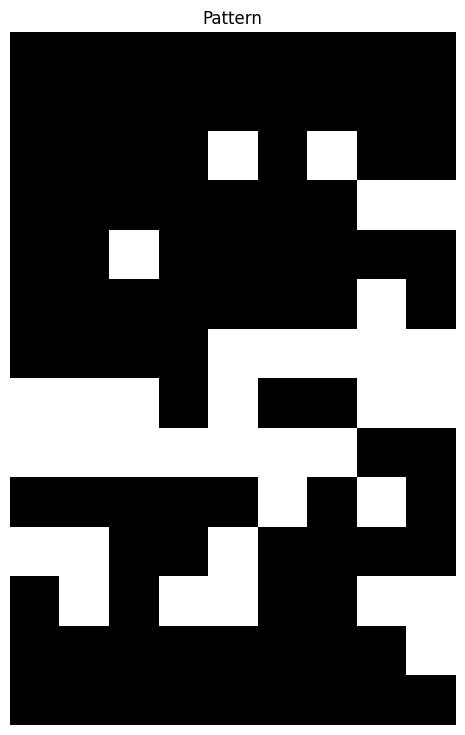

2


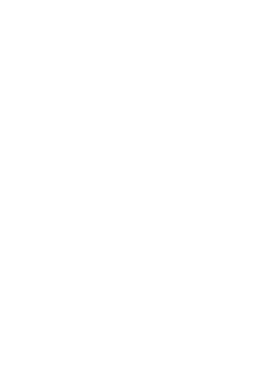

In [11]:
# Create a Hopfield network with 126 neurons (14x9 grid)
network = HopfieldNetwork(n_neurons=126, shape=(14, 9))

for pattern in animals_list:
    pattern_visualise(pattern, network)

network.train(animals_list, learning_rule='oja', eta=0.5)

noisy_pattern = np.random.choice([1], size=126)

states = network.retrieve(noisy_pattern, mode='synchronous')


pattern_visualise(noisy_pattern, network)

pattern_visualise(network.state, network)

print(len(states))

anim = network.interactive_visualize(states)
HTML(anim.to_jshtml())